In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
import sklearn.metrics as metrics
from sklearn.metrics import r2_score,roc_auc_score,classification_report,mean_squared_error,accuracy_score,confusion_matrix

In [3]:
### read datasets
train=pd.read_csv("train_ctrUa4K.csv")
test=pd.read_csv("test_lAUu6dG.csv")

test_cpy=test.copy()

In [4]:
round((test.isnull().sum()/len(test.index))*100,2)

Loan_ID              0.00
Gender               3.00
Married              0.00
Dependents           2.72
Education            0.00
Self_Employed        6.27
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           1.36
Loan_Amount_Term     1.63
Credit_History       7.90
Property_Area        0.00
dtype: float64

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
train.shape

(614, 13)

In [8]:
test.shape

(367, 12)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [10]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


###  Univariate analysis

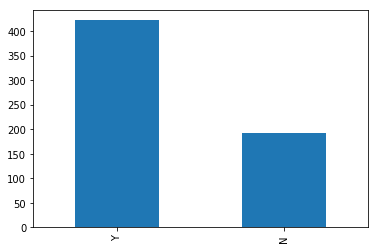

In [11]:
train['Loan_Status'].value_counts().plot.bar()

### Independent Variable (Categorical)

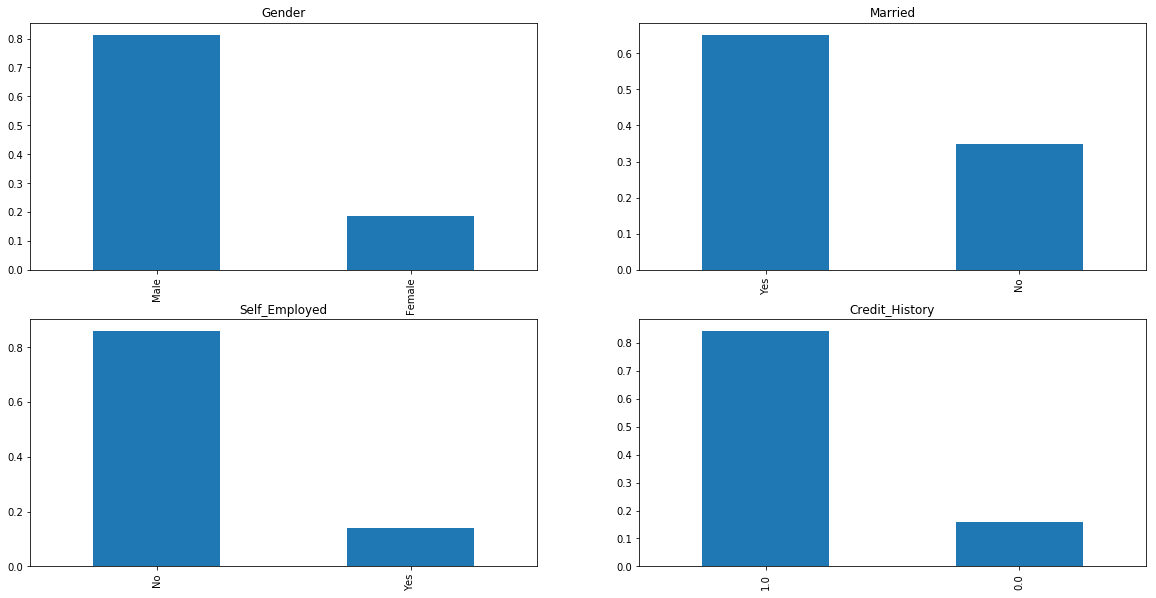

In [12]:
# Independent Variable (Categorical)

plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

In [13]:
# It can be inferred from the above bar plots that:

#     80% applicants in the dataset are male.
#     Around 65% of the applicants in the dataset are married.
#     Around 15% applicants in the dataset are self employed.
#     Around 85% applicants have repaid their debts.

### Independent Variable (Ordinal)

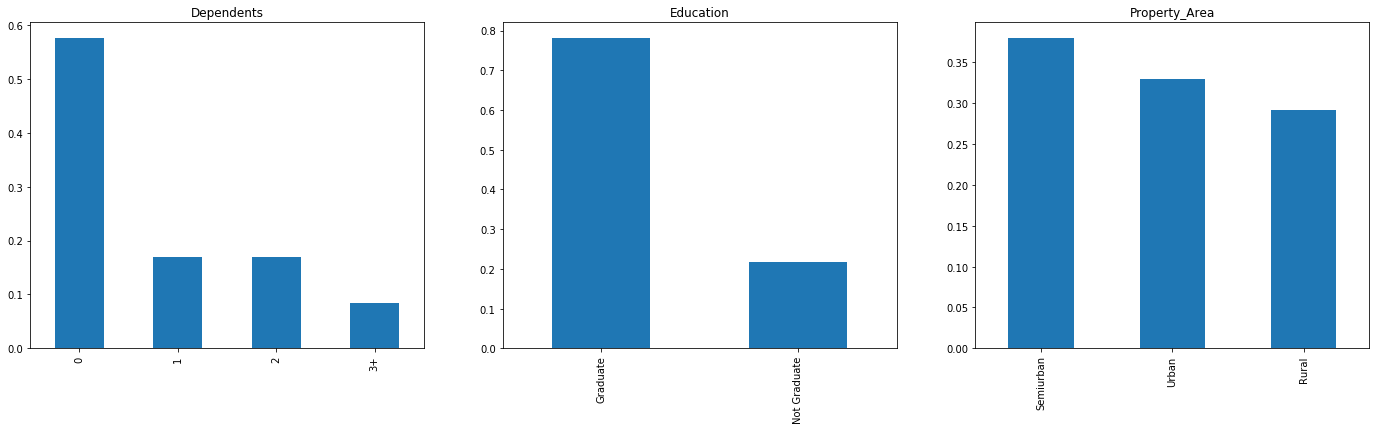

In [14]:
plt.figure(1) 
plt.subplot(131) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(132) 
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

In [15]:
# Following inferences can be made from the above bar plots:

#     Most of the applicants don’t have any dependents.
#     Around 80% of the applicants are Graduate.
#     Most of the applicants are from Semiurban area.

### Independent Variable (Numerical)

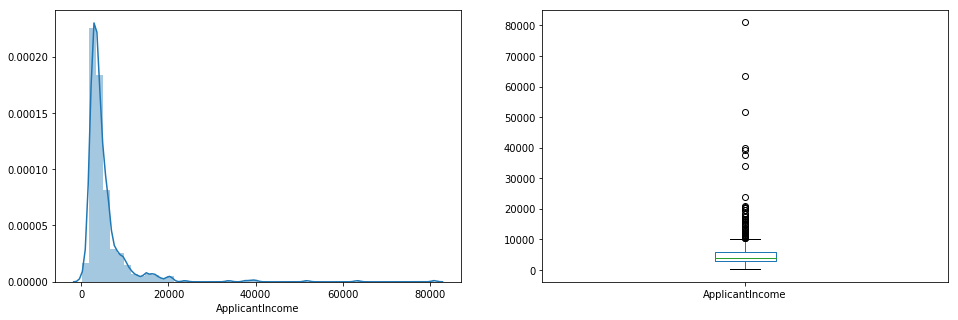

In [16]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

Text(0.5, 0.98, '')

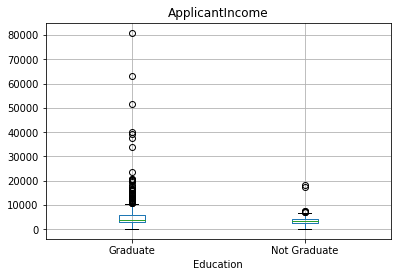

In [17]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

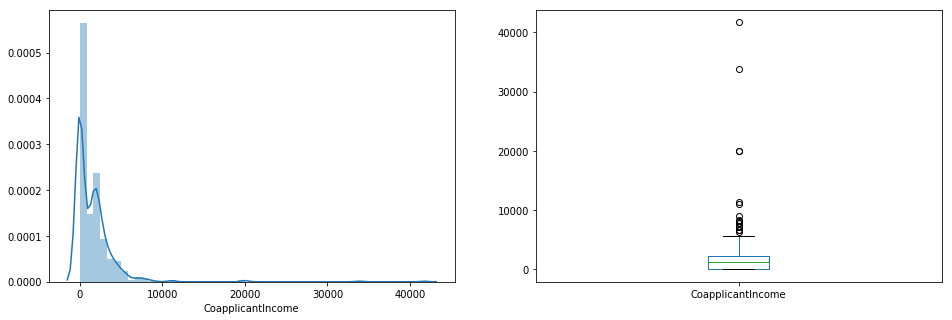

In [18]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome']); 
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

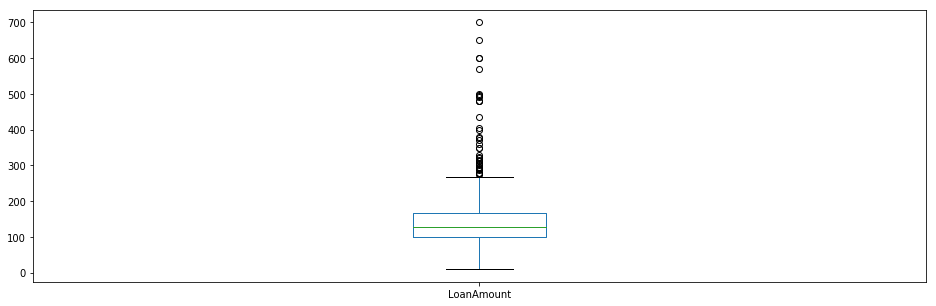

In [19]:
# Let’s look at the distribution of LoanAmount variable.

train['LoanAmount'].plot.box(figsize=(16,5)) 

### Categorical Independent Variable vs Target Variable

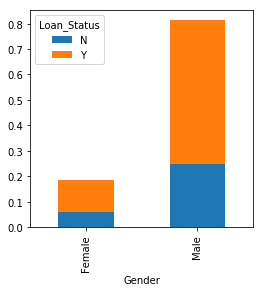

In [26]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'],normalize=True) 
Gender.plot(kind="bar", stacked=True, figsize=(4,4))

# It can be inferred that the proportion of male and female applicants 
# is more or less same for both approved and unapproved loans.

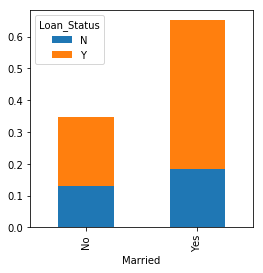

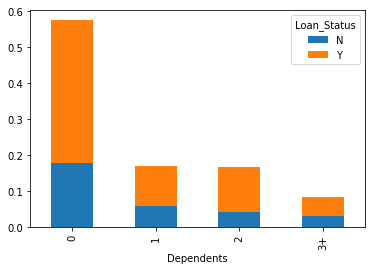

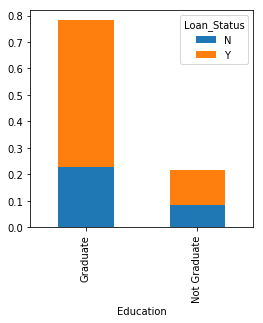

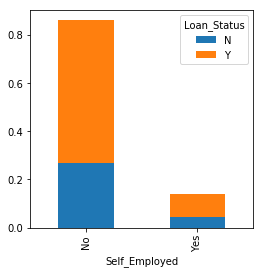

In [27]:
Married=pd.crosstab(train['Married'],train['Loan_Status'],normalize=True) 
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'],normalize=True) 
Education=pd.crosstab(train['Education'],train['Loan_Status'],normalize=True) 
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'],normalize=True) 

Married.plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Dependents.plot(kind="bar", stacked=True) 
plt.show() 
Education.plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Self_Employed.plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()


#  Proportion of married applicants is higher for the approved loans.
#  Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
#  There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

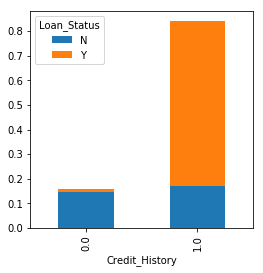

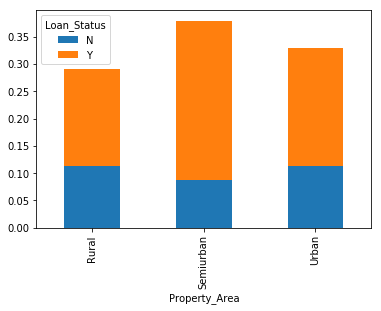

In [28]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'],normalize=True) 
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'],normalize=True) 
Credit_History.plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Property_Area.plot(kind="bar", stacked=True) 
plt.show()

#  It seems people with credit history as 1 are more likely to get their loans approved.
#  Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

### Numerical Independent Variable vs Target Variable

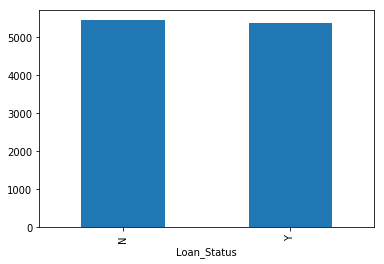

In [29]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

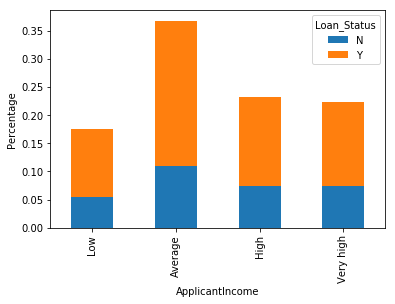

In [30]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'],normalize=True) 
Income_bin.plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

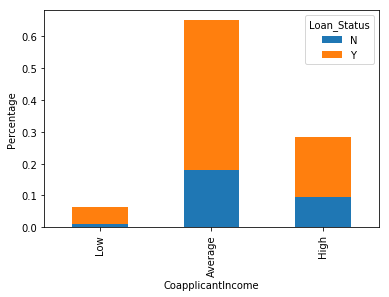

In [31]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'],normalize=True) 
Coapplicant_Income_bin.plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')


# It shows that if coapplicant’s income is less the chances of loan approval are high. 
# But this does not look right. The possible reason behind this may be that most of the applicants don’t 
# have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not 
# dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s 
# income to visualize the combined effect of income on loan approval.

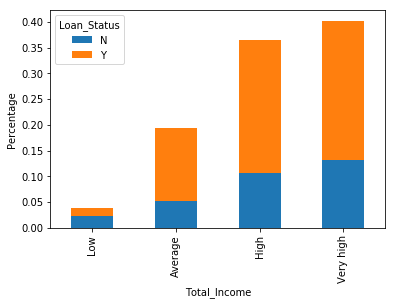

In [32]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'],normalize=True) 
Total_Income_bin.plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')


# It can be seen that the proportion of approved loans is higher for Low and Average 
# Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that 
# the chances of loan approval will be high when the loan amount is less.

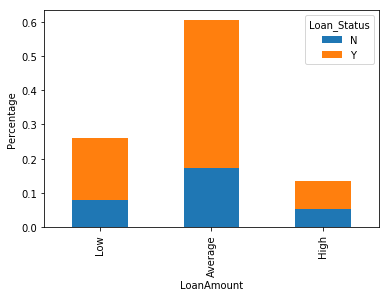

In [33]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'],normalize=True) 
LoanAmount_bin.plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

In [28]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

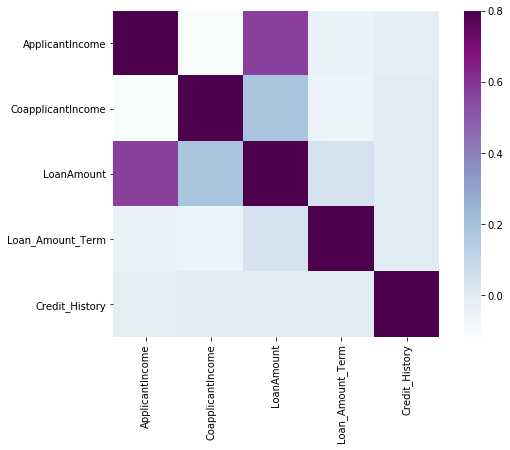

In [29]:
matrix = train.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

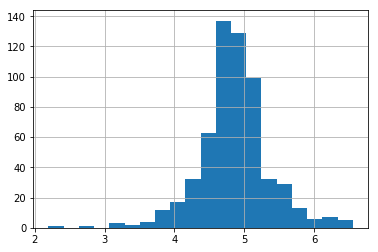

In [30]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 


In [31]:
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [32]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [33]:
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [34]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [35]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [36]:
train['Dependents'].value_counts()
train['Dependents']=train['Dependents'].fillna(0)
train['Dependents'].replace({'3+':3},inplace=True)

test['Dependents']=test['Dependents'].fillna(0)
test['Dependents'].replace({'3+':3},inplace=True)

In [37]:
train['Gender']=train['Gender'].map({'Male':1, 'Female': 0})
test['Gender']=test['Gender'].map({'Male':1, 'Female': 0})
train['Gender']=train['Gender'].fillna(1).astype('int')
test['Gender']=test['Gender'].fillna(1).astype('int')

train['Self_Employed']=train['Self_Employed'].map({'Yes':1, 'No': 0})
test['Self_Employed']=test['Self_Employed'].map({'Yes':1, 'No': 0})
train['Self_Employed']=train['Self_Employed'].fillna(0).astype(int)
test['Self_Employed']=test['Self_Employed'].fillna(0).astype(int)

train['Married']=train['Married'].map({'Yes':1, 'No': 0})
test['Married']=test['Married'].map({'Yes':1, 'No': 0})
train['Married']=train['Married'].fillna(1).astype('int')


train['Education']=train['Education'].map({'Graduate':1, 'Not Graduate': 0})
test['Education']=test['Education'].map({'Graduate':1, 'Not Graduate': 0})

train['Loan_Status']=train['Loan_Status'].map({'Y':1, 'N': 0})

In [38]:
train['Dependents']=train['Dependents'].astype(int)
test['Dependents']=test['Dependents'].astype(int)

In [39]:
# train_pa=pd.get_dummies(train['Property_Area'],drop_first=True)
# test_pa=pd.get_dummies(test['Property_Area'],drop_first=True)

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

train['Property_Area']=le.fit_transform(train['Property_Area'])
test['Property_Area']=le.fit_transform(test['Property_Area'])

In [41]:
# train=pd.concat([train,train_pa],axis=1)
# test=pd.concat([test,test_pa],axis=1)

In [42]:
# train.drop(['Property_Area','Loan_ID'],axis=1,inplace=True)
# test.drop(['Property_Area','Loan_ID'],axis=1,inplace=True)

train.drop(['Loan_ID'],axis=1,inplace=True)
test.drop(['Loan_ID'],axis=1,inplace=True)

In [43]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,1,0,0,1,0,5849,0.0,NaN,360.0,1.0,2,1,NaN
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,4.852030
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,4.189655
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,4.787492
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,4.948760


In [44]:
round((train.isnull().sum()/len(train.index))*100,2)

Gender               0.00
Married              0.00
Dependents           0.00
Education            0.00
Self_Employed        0.00
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
LoanAmount_log       3.58
dtype: float64

In [45]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,2,4.700480
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2,4.836282
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2,5.337538
3,1,1,2,1,0,2340,2546,100.0,360.0,NaN,2,4.605170
4,1,0,0,0,0,3276,0,78.0,360.0,1.0,2,4.356709


In [46]:
test.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
LoanAmount_log        5
dtype: int64

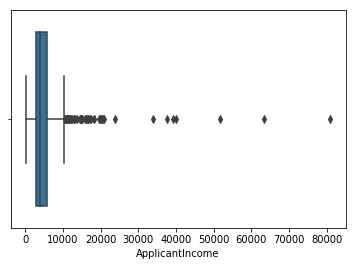

In [47]:
sns.boxplot(x=train['ApplicantIncome'])

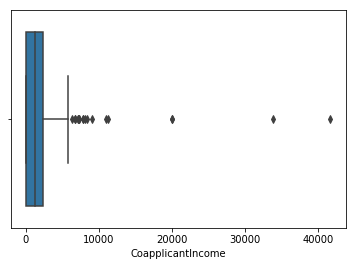

In [48]:
sns.boxplot(x=train['CoapplicantIncome'])

In [49]:
# Q1 = train.ApplicantIncome.quantile(0.25)
# Q3 = train.ApplicantIncome.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

In [50]:
# train_out = train[~((train['ApplicantIncome'] < (Q1 - 1.5 * IQR)) |(train['ApplicantIncome'] > (Q3 + 1.5 * IQR)))]
# train_out.shape

In [51]:
# Q1 = train.CoapplicantIncome.quantile(0.25)
# Q3 = train.CoapplicantIncome.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

In [52]:
# train_out1 = train_out[~((train_out['CoapplicantIncome'] < (Q1 - 1.5 * IQR)) |(train_out['CoapplicantIncome'] > (Q3 + 1.5 * IQR)))]
# train_out1.shape

In [53]:
# Q1 = train.LoanAmount.quantile(0.25)
# Q3 = train.LoanAmount.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

In [54]:
# train_out2 = train_out1[~((train_out1['LoanAmount'] < (Q1 - 1.5 * IQR)) |(train_out1['LoanAmount'] > (Q3 + 1.5 * IQR)))]
# train_out2.shape

In [55]:
# train_out2.describe()
train_out2=train

In [56]:
train_out2.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [57]:
train_out2['TotalIncome']=train_out2['ApplicantIncome']+train_out2['CoapplicantIncome']
test['TotalIncome']=test['ApplicantIncome']+test['CoapplicantIncome']




In [58]:
train_out2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome
0,1,0,0,1,0,5849,0.0,NaN,360.0,1.0,2,1,NaN,5849.0
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,4.852030,6091.0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,4.189655,3000.0
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,4.787492,4941.0
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,4.948760,6000.0


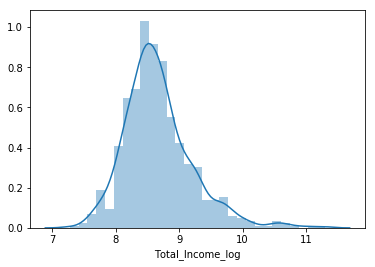

In [59]:
train_out2['Total_Income_log'] = np.log(train_out2['TotalIncome']) 
sns.distplot(train_out2['Total_Income_log']); 
test['Total_Income_log'] = np.log(test['TotalIncome'])

In [60]:
train_out2.drop(['ApplicantIncome','CoapplicantIncome','TotalIncome','LoanAmount'],axis=1,inplace=True)
test.drop(['ApplicantIncome','CoapplicantIncome','TotalIncome','LoanAmount'],axis=1,inplace=True)

In [61]:
train_out2.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income_log
0,1,0,0,1,0,360.0,1.0,2,1,NaN,8.674026
1,1,1,1,1,0,360.0,1.0,0,0,4.852030,8.714568
2,1,1,0,1,1,360.0,1.0,2,1,4.189655,8.006368
3,1,1,0,0,0,360.0,1.0,2,1,4.787492,8.505323
4,1,0,0,1,0,360.0,1.0,2,1,4.948760,8.699515


In [62]:
train_out2['LoanAmount_log']=train_out2['LoanAmount_log'].fillna(train_out2['LoanAmount_log'].median())
train_out2['Loan_Amount_Term']=train_out2['Loan_Amount_Term'].fillna(train_out2['Loan_Amount_Term'].mean())
train_out2['Credit_History']=train_out2['Credit_History'].fillna(train_out2['Credit_History'].mean())

test['LoanAmount_log']=test['LoanAmount_log'].fillna(test['LoanAmount_log'].median())
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean())
test['Credit_History']=test['Credit_History'].fillna(test['Credit_History'].mean())

In [63]:
### new variable EMI

train_out2['EMI']=train_out2['LoanAmount_log']/train_out2['Loan_Amount_Term']
test['EMI']=test['LoanAmount_log']/test['Loan_Amount_Term']

In [64]:
# Normalising continuous features
df = train_out2[['EMI','Total_Income_log']]
df_test = test[['EMI','Total_Income_log']]


In [65]:
df.head()

,EMI,Total_Income_log
0,0.013478,8.674026
1,0.013478,8.714568
2,0.011638,8.006368
3,0.013299,8.505323
4,0.013747,8.699515


In [66]:
normalized_df=(df-df.mean())/df.std()
normalized_df_test=(df_test-df_test.mean())/df_test.std()

In [67]:
normalized_df.head()

,EMI,Total_Income_log
0,-0.146198,0.008462
1,-0.146198,0.082836
2,-0.249447,-1.216372
3,-0.156258,-0.301027
4,-0.131120,0.055221


In [68]:
train_out2=train_out2.drop(['EMI','Total_Income_log','LoanAmount_log','Loan_Amount_Term'],axis=1)
# train_out2=train_out2.drop(['LoanAmount','Loan_Amount_Term'],axis=1)
df=pd.concat([normalized_df,train_out2],axis=1)

df.head(10)


,EMI,Total_Income_log,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,-0.146198,0.008462,1,0,0,1,0,1.0,2,1
1,-0.146198,0.082836,1,1,1,1,0,1.0,0,0
2,-0.249447,-1.216372,1,1,0,1,1,1.0,2,1
3,-0.156258,-0.301027,1,1,0,0,0,1.0,2,1
4,-0.131120,0.055221,1,0,0,1,0,1.0,2,1
5,-0.031595,0.919935,1,1,2,1,1,1.0,2,1
6,-0.192673,-0.759207,1,1,0,0,0,1.0,2,1
7,-0.113376,-0.091109,1,1,3,1,0,0.0,1,0
8,-0.103810,-0.093760,1,1,2,1,0,1.0,2,1
9,0.010153,2.583749,1,1,1,1,0,1.0,1,0


In [69]:
test=test.drop(['EMI','Total_Income_log','LoanAmount_log','Loan_Amount_Term'],axis=1)
# test=test.drop(['LoanAmount','Loan_Amount_Term'],axis=1)
test_df=pd.concat([normalized_df_test,test],axis=1)


In [70]:
test_df.head()

,EMI,Total_Income_log,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,-0.115770,0.072440,1,1,0,1,0,1.000000,2
1,-0.107587,-0.396630,1,1,1,1,0,1.000000,2
2,-0.077383,0.436005,1,1,2,1,0,1.000000,2
3,-0.121513,-0.258840,1,1,2,1,0,0.825444,2
4,-0.136485,-1.099155,1,0,0,0,0,1.000000,2


In [71]:
round((test_df.isnull().sum()/len(test_df.index))*100,2)

EMI                 0.0
Total_Income_log    0.0
Gender              0.0
Married             0.0
Dependents          0.0
Education           0.0
Self_Employed       0.0
Credit_History      0.0
Property_Area       0.0
dtype: float64

In [72]:
#set seed for same results everytime
seed=0
import sklearn.ensemble as ensemble
import sklearn.metrics as metrics

X=df.drop('Loan_Status',1)
y=df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =1)

#declare the models
lr = LogisticRegression()
rf=RandomForestClassifier()
adb=ensemble.AdaBoostClassifier()
bgc=ensemble.BaggingClassifier()
gnb = GaussianNB()
knn=KNeighborsClassifier()
dt = DecisionTreeClassifier()
bgcl_lr = BaggingClassifier(base_estimator=lr, random_state=0)

# ,ab_rf,ab_dt,ab_nb,ab_lr,bgcl_lr

models=[lr,rf,adb,bgc,gnb,knn,dt,bgcl_lr]
sctr,scte,auc,ps,rs,acc=[],[],[],[],[],[]
def ens(X_train,X_test, y_train, y_test):
    for model in models:
            model.fit(X_train, y_train)
            y_test_pred = model.predict(X_test)
            y_test_pred_new=model.predict_proba(X_test)
            y_test_pred_new=y_test_pred_new[:,1]
            train_score=model.score(X_train,y_train)
            test_score=model.score(X_test,y_test)
            p_score=metrics.precision_score(y_test,y_test_pred)
            r_score=metrics.recall_score(y_test,y_test_pred)
            accr=metrics.accuracy_score(y_test,y_test_pred)
            ac=metrics.roc_auc_score(y_test,y_test_pred_new)
            
            sctr.append(train_score)
            scte.append(test_score)
            ps.append(p_score)
            rs.append(r_score)
            auc.append(ac)
            acc.append(accr)
    return sctr,scte,auc,ps,rs,acc

ens(X_train,X_test, y_train, y_test)
# 'ab_rf','ab_dt','ab_nb','ab_lr','bgcl_lr'
ensemble=pd.DataFrame({'names':['Logistic Regression','Random Forest','Ada boost','Bagging',
                                'Naive-Bayes','KNN','Decistion Tree',
                                'bagged LR'],
                       'auc_score':auc,'training':sctr,'testing':scte,'precision':ps,'recall':rs,'accuracy':acc})
ensemble=ensemble.sort_values(by='auc_score',ascending=False).reset_index(drop=True)
ensemble

,names,auc_score,training,testing,precision,recall,accuracy
0,Naive-Bayes,0.763431,0.810591,0.804878,0.783019,0.988095,0.804878
1,Random Forest,0.748168,0.983707,0.772358,0.811111,0.869048,0.772358
2,Ada boost,0.741606,0.835031,0.796748,0.792079,0.952381,0.796748
3,Bagging,0.736874,0.983707,0.747967,0.791209,0.857143,0.747967
4,Decistion Tree,0.710623,1.000000,0.764228,0.808989,0.857143,0.764228
5,Logistic Regression,0.670635,0.810591,0.804878,0.783019,0.988095,0.804878
6,bagged LR,0.663309,0.808554,0.804878,0.783019,0.988095,0.804878
7,KNN,0.656288,0.824847,0.691057,0.739583,0.845238,0.691057


### random forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()



In [74]:
rf.fit(X,y)

y_test_pred_rf=rf.predict(test_df)
finalpred=pd.concat([test_cpy['Loan_ID'],pd.DataFrame(y_test_pred_rf,columns=['Loan_Status'])],1)
finalpred.to_csv("sub.csv",index=False)

### Decision trees

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =0)
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

dt = DecisionTreeClassifier()
dt_params = {'max_depth':np.arange(1,10), 'min_samples_leaf':np.arange(2,30), 'criterion':['entropy','gini']}
rscv = RandomizedSearchCV(dt, dt_params, cv=5, scoring='roc_auc')
rscv.fit(X, y)
print(rscv.best_params_)
rscv_best_DT=rscv.best_params_

DT=DecisionTreeClassifier(**rscv_best_DT)
DT.fit(X,y)
y_test_pred_DT=DT.predict(test_df)
finalpred=pd.concat([test_cpy['Loan_ID'],pd.DataFrame(y_test_pred_DT,columns=['Loan_Status'])],1)
finalpred.to_csv("pred.csv",index=False)

{'min_samples_leaf': 8, 'max_depth': 9, 'criterion': 'entropy'}


C:\Users\Ankita Paithankar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### XGBOOST

In [76]:
import xgboost as xgb 
from xgboost.sklearn import XGBClassifier

In [77]:
xgb=XGBClassifier(learning_rate=0.09,n_estimators=125,max_depth=4,min_child_weight=4,colsample_bytree=0.5,reg_alpha=0.000001 )

In [78]:
xgb.fit(X,y)
y_test_pred_xgb=xgb.predict(test_df)
finalpred=pd.concat([test_cpy['Loan_ID'],pd.DataFrame(y_test_pred_DT,columns=['Loan_Status'])],1)
finalpred.to_csv("xgb.csv",index=False)

### Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,          
                      intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,          
                      penalty='l2', random_state=1, solver='liblinear', tol=0.0001,          
                      verbose=0, warm_start=False)

lr.fit(X,y)


y_test_pred_lr=lr.predict(test_df)
# y_test_pred=y_test_pred_lr.map(lambda x: 'Ý' if x==1 else 'N')
finalpred=pd.concat([test_cpy['Loan_ID'],pd.DataFrame(y_test_pred_lr,columns=['Loan_Status'])],1)
finalpred.to_csv("LR_1.csv",index=False)

In [110]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [113]:


print("Before OverSampling, counts of label '1': {}".format(sum(y == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0))) 

from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X, y.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 422
Before OverSampling, counts of label '0': 192 



Using TensorFlow backend.


After OverSampling, the shape of train_X: (844, 9)
After OverSampling, the shape of train_y: (844,) 

After OverSampling, counts of label '1': 422
After OverSampling, counts of label '0': 422


In [116]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,          
                      intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,          
                      penalty='l2', random_state=1, solver='liblinear', tol=0.0001,          
                      verbose=0, warm_start=False)


lr.fit(X_train_res,y_train_res)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [117]:
# accuracy_score(y_test,y_test_p)

In [118]:
y_test_pred_lr=lr.predict(test_df)
# y_test_pred=y_test_pred_lr.map({'1': 'Y', '0':'N'})
finalpred=pd.concat([test_cpy['Loan_ID'],pd.DataFrame(y_test_pred_lr,columns=['Loan_Status'])],1)

finalpred.to_csv("LR_2.csv",index=False)